# **Air quality classification**

# Dataset source
The dataset used in this project is sourced from Kaggle. You can access it through the following link:
[Air Quality Data in India(2015-2020)](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)

# Table of Contents
1. [Importing libraries](#Importing-libraries) 
2. [Preprocessing](#Preprocessing)
3. [Split to Train and test set](#Split-to-Train-and-test-set)
4. [Model Implementation](#Model-Implementation)
   - 4.1 [SVM](#SVM-model)
   - 4.2 [Decision Tree](#DecisionTree-model)
   - 4.3 [RandomForest](#RandomForest-model)
5. [Final Model selection](#Final-model-selection)
6. [Results of Final Model](#Results-of-Final-model)

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# Preprocessing

In [2]:
air_data = pd.read_csv("C:\\Users\\vamsh_peqmhvm\\Downloads\\city_day.csv")
air_data['Date'] = pd.to_datetime(air_data['Date'])
air_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
air_data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [4]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [5]:
air_data.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,2018-05-14 05:40:15.807118080,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-04-16 00:00:00,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,2018-08-05 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,2019-09-03 00:00:00,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585


In [6]:
bucket_stats = air_data.groupby("AQI_Bucket")["AQI"].agg(["min", "max"]).sort_values("min")
print("AQI Ranges for Each class:")
for bucket, row in bucket_stats.iterrows():
    print(f"{bucket}:{row['min']} - {row['max']}")

AQI Ranges for Each class:
Good:13.0 - 50.0
Satisfactory:51.0 - 100.0
Moderate:101.0 - 200.0
Poor:201.0 - 300.0
Very Poor:301.0 - 400.0
Severe:401.0 - 2049.0


**The Xylene columns is having Nans for >60% of the data, so it make sense to drop the column rather than filling it.**

In [7]:
air_data.drop('Xylene', axis=1, inplace=True)

**As it is a time-series data, interpolation would be the best choice to fill the Nans**

In [ ]:
numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
#here im interpolating city-wise, because different cities will have different enviornmental conditions
air_data[numerical_columns] = air_data.groupby('City')[numerical_columns].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))
air_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory


In [9]:
air_data.isna().sum()

City             0
Date             0
PM2.5            0
PM10          2009
NO               0
NO2              0
NOx           1169
NH3           2009
CO               0
SO2              0
O3             162
Benzene       2732
Toluene       4010
AQI           4681
AQI_Bucket    4681
dtype: int64

**some Nans were not filled through the interpolation. so, i have filled those values with the medians of their respective columns**

In [10]:
air_data[numerical_columns] = air_data[numerical_columns].fillna(air_data[numerical_columns].median())
air_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,16.54,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,16.54,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,16.54,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,16.54,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,16.54,22.10,39.33,39.31,7.01,18.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory


In [11]:
air_data.isna().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI           4681
AQI_Bucket    4681
dtype: int64

**AQI is calculated based on the concentration of the pollutants. below, plot is the visualization between AQI and Maximum value of other columns**

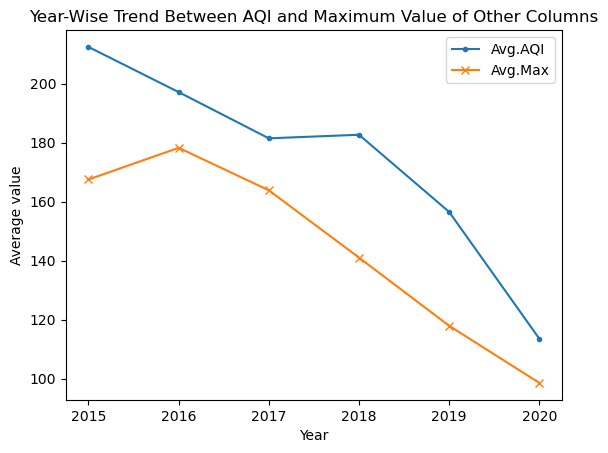

In [12]:
air_data['Year'] = air_data['Date'].dt.year
air_data['Max_of_allcolumns'] = air_data[numerical_columns].max(axis=1)
yearly_data = air_data.groupby('Year')[['AQI', 'Max_of_allcolumns']].mean()
plt.plot(yearly_data.index, yearly_data['AQI'], label='Avg.AQI', marker='.')
plt.plot(yearly_data.index, yearly_data['Max_of_allcolumns'], label='Avg.Max', marker='x')
plt.title('Year-Wise Trend Between AQI and Maximum Value of Other Columns')
plt.xlabel('Year')
plt.ylabel('Average value')
plt.legend()

**The AQI and Max. of other columns are approximately near to each other. So, i have decided to fill the Nans of AQI with maximum value of the other columns**

In [13]:
air_data['AQI'] = air_data['AQI'].fillna(air_data['Max_of_allcolumns'])
air_data.drop('Max_of_allcolumns', axis=1, inplace=True)
air_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,16.54,0.92,27.64,133.36,0.00,0.02,141.54,NaN,2015
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,16.54,0.97,24.55,34.06,3.68,5.50,141.54,NaN,2015
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,16.54,17.40,29.07,30.70,6.80,16.40,141.54,NaN,2015
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,16.54,1.70,18.59,36.08,4.43,10.14,141.54,NaN,2015
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,16.54,22.10,39.33,39.31,7.01,18.89,141.54,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.00,Good,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.00,Satisfactory,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.00,Satisfactory,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.00,Satisfactory,2020


**Filling the Nans of the AQI_bucket, based on the AQI values**

In [14]:
conditions = [(air_data['AQI']<=50), (air_data['AQI']>50)&(air_data['AQI']<=100), (air_data['AQI']>100)&(air_data['AQI']<=200),
             (air_data['AQI']>200)&(air_data['AQI']<=300), (air_data['AQI']>300)&(air_data['AQI']<=400), (air_data['AQI']>400)]
categories = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
air_data['AQI_Bucket'] = np.select(conditions, categories, default=np.nan)
air_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,16.54,0.92,27.64,133.36,0.00,0.02,141.54,Moderate,2015
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,16.54,0.97,24.55,34.06,3.68,5.50,141.54,Moderate,2015
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,16.54,17.40,29.07,30.70,6.80,16.40,141.54,Moderate,2015
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,16.54,1.70,18.59,36.08,4.43,10.14,141.54,Moderate,2015
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,16.54,22.10,39.33,39.31,7.01,18.89,141.54,Moderate,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.00,Good,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.00,Satisfactory,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.00,Satisfactory,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.00,Satisfactory,2020


In [15]:
air_data.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year
count,29531,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,71.042188,120.475568,23.015583,27.033618,32.764487,24.401432,3.328664,22.407083,33.288873,3.292905,7.458921,167.618104,2017.887914
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,9.590000,2015.000000
25%,2017-04-16 00:00:00,26.750000,58.530000,5.930000,10.650000,14.060000,8.575323,0.500000,5.870000,17.355833,0.150000,0.780000,83.000000,2017.000000
50%,2018-08-05 00:00:00,48.050000,97.820000,10.400000,20.270000,23.790000,16.540000,0.910000,9.690000,29.266667,1.000000,2.630000,125.778444,2018.000000
75%,2019-09-03 00:00:00,84.868441,152.410130,23.230000,35.240000,39.950000,36.330000,1.510000,17.840000,43.828103,2.790000,7.200000,199.000000,2019.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,2049.000000,2020.000000
std,NaN,74.679338,90.655176,33.385821,23.859672,31.462305,24.325059,13.002122,38.781125,21.310352,15.767085,18.254970,137.388482,1.533783


# Split to Train and test set

In [26]:
air_data.drop(['City', 'Date', 'Year'], axis=1, inplace=True)
air_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,73.24,141.54,0.92,18.22,17.15,16.54,0.92,27.64,133.36,0.00,0.02,141.54,Moderate
1,73.24,141.54,0.97,15.69,16.46,16.54,0.97,24.55,34.06,3.68,5.50,141.54,Moderate
2,73.24,141.54,17.40,19.30,29.70,16.54,17.40,29.07,30.70,6.80,16.40,141.54,Moderate
3,73.24,141.54,1.70,18.48,17.97,16.54,1.70,18.59,36.08,4.43,10.14,141.54,Moderate
4,73.24,141.54,22.10,21.42,37.76,16.54,22.10,39.33,39.31,7.01,18.89,141.54,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.00,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.00,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.00,Satisfactory
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.00,Satisfactory


In [27]:
#converting categorical data to numerical data
aqi_mapping = {'Good':1, 'Satisfactory':2, 'Moderate':3, 'Poor':4, 'Very Poor':5, 'Severe':6}
air_data['AQI_category'] = air_data['AQI_Bucket'].map(aqi_mapping)
air_data.drop('AQI_Bucket', axis=1, inplace=True)
air_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_category
0,73.24,141.54,0.92,18.22,17.15,16.54,0.92,27.64,133.36,0.00,0.02,141.54,3
1,73.24,141.54,0.97,15.69,16.46,16.54,0.97,24.55,34.06,3.68,5.50,141.54,3
2,73.24,141.54,17.40,19.30,29.70,16.54,17.40,29.07,30.70,6.80,16.40,141.54,3
3,73.24,141.54,1.70,18.48,17.97,16.54,1.70,18.59,36.08,4.43,10.14,141.54,3
4,73.24,141.54,22.10,21.42,37.76,16.54,22.10,39.33,39.31,7.01,18.89,141.54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.00,1
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.00,2
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.00,2
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.00,2


In [28]:
#normalize the data for model implementation.
scaler = MinMaxScaler()
columns_to_normalize = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']
air_data[columns_to_normalize] = scaler.fit_transform(air_data[columns_to_normalize])
air_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_category
0,0.077057,0.141531,0.002304,0.050276,0.036674,0.046843,0.005233,0.142533,0.517422,0.000000,0.000044,0.064700,3
1,0.077057,0.141531,0.002432,0.043291,0.035199,0.046843,0.005517,0.126593,0.132120,0.008087,0.012092,0.064700,3
2,0.077057,0.141531,0.044489,0.053258,0.063512,0.046843,0.098970,0.149910,0.119083,0.014944,0.036056,0.064700,3
3,0.077057,0.141531,0.004300,0.050994,0.038428,0.046843,0.009670,0.095847,0.139958,0.009736,0.022293,0.064700,3
4,0.077057,0.141531,0.056520,0.059111,0.080748,0.046843,0.125704,0.202837,0.152491,0.015406,0.041530,0.064700,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,0.015769,0.050931,0.019608,0.069161,0.041785,0.035309,0.002673,0.044055,0.090369,0.004923,0.026536,0.015402,1
29527,0.025622,0.074081,0.008703,0.071922,0.035348,0.033949,0.002958,0.065566,0.116910,0.001626,0.004859,0.029621,2
29528,0.024075,0.065721,0.008780,0.081502,0.039198,0.030322,0.002730,0.043384,0.120092,0.000022,0.000022,0.028641,2
29529,0.017475,0.049960,0.010316,0.080756,0.040203,0.028395,0.002958,0.050709,0.109770,0.000000,0.000000,0.021776,2


**Normalization of features leads to speeding up the covergence and ensuring equal contribution of features to the model**

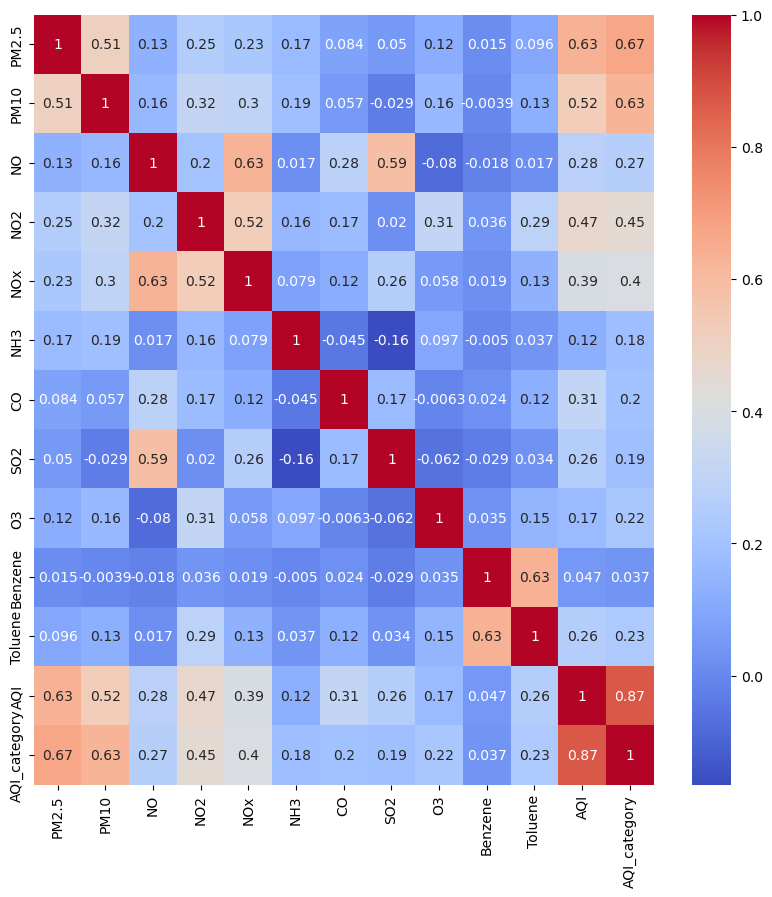

In [29]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
corr = air_data.corr()
sn.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Here AQI is co-related to every column, so i drop this column. im not dropping the rest of the columns though they are related. because as per domain knowledge, concentration of every pollutant is important to classify the air quality.
Also, we categorized the Air quality based on AQI value only. and AQI is calculated based on the concentration of the pollutants. so, iam going to a develop model to classify the Air quality directly with the concentration o the pollutants rather than the traditional method to calculate the AQI with formula derived theoretically.**

In [30]:
#use stratify hyper-parameter to maintain the class ratio in training and test data. to avoid bias
training_data, testing_data = train_test_split(air_data, test_size=0.2, stratify=air_data['AQI_category'], random_state=7)
training_data.shape, testing_data.shape

((23624, 13), (5907, 13))

In [31]:
#splitting the data to inputs and labels(i.e, x&y)
y_train = training_data['AQI_category']
training_data.drop('AQI_category', axis=1, inplace=True)
x_train = training_data
y_test = testing_data['AQI_category']
testing_data.drop('AQI_category', axis=1, inplace=True)
x_test = testing_data

# Model Implementation

In [32]:
#store the results for the final evaluation & selection of the model
results = []

#  SVM model

In [33]:
#cross-validation on basic model
svm_model = SVC(kernel='rbf', random_state=42)
cv_scores_svm = cross_val_score(svm_model, x_train, y_train, cv=5)
print(f'cv_scores :{cv_scores_svm}')

cv_scores :[0.93693122 0.9362963  0.93502646 0.93079365 0.92569856]


In [34]:
#hyper-parameter tuning
param_grid = {'C':[0.1, 1, 10], 'gamma':[0.01, 0.1, 1], 'kernel':['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm_model,param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search_svm.fit(x_train, y_train)
best_params = grid_search_svm.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


# plot Train and test results(svm)

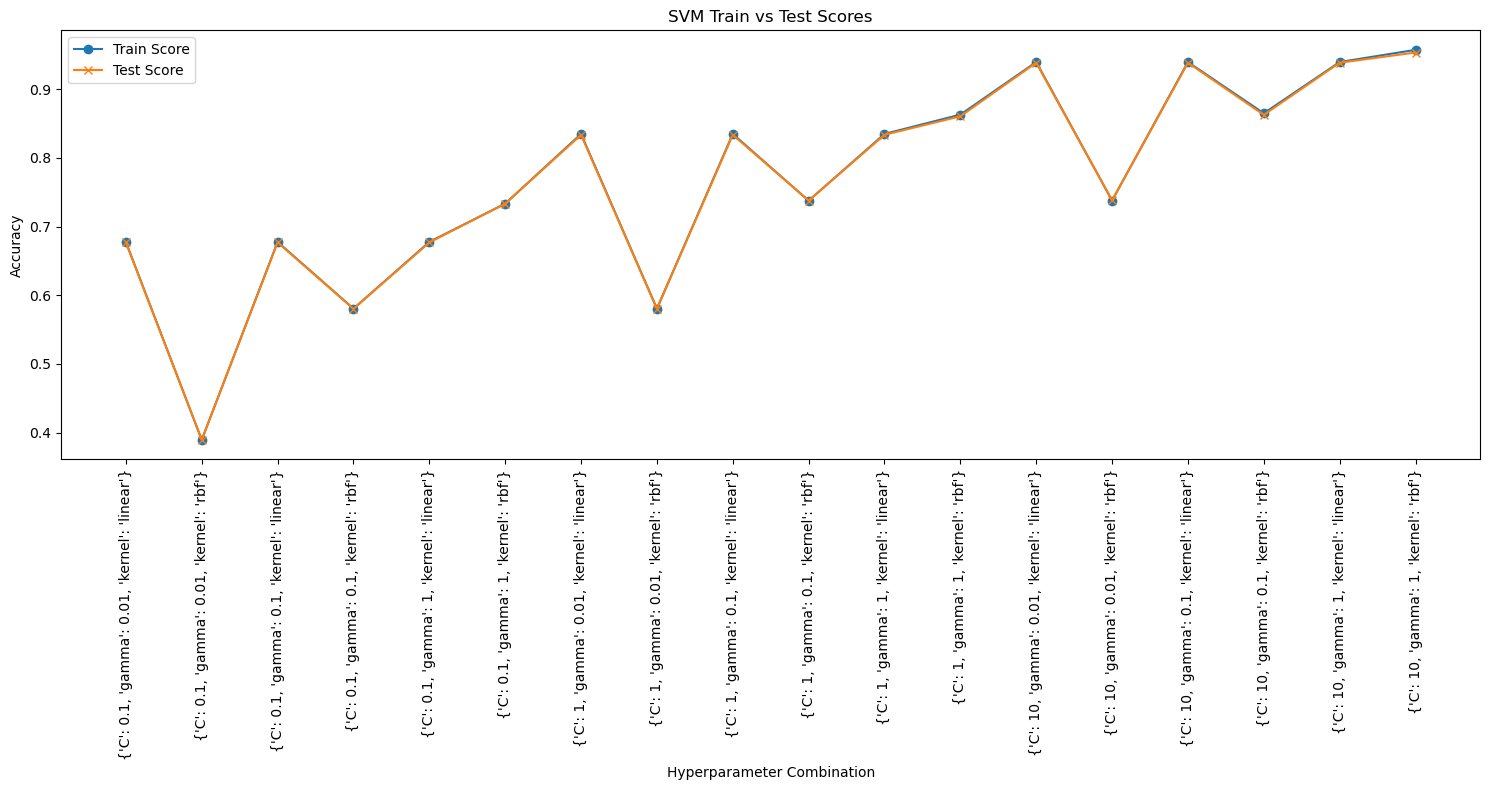

In [36]:
train_scores = grid_search_svm.cv_results_['mean_train_score']
test_scores = grid_search_svm.cv_results_['mean_test_score']
plt.figure(figsize=(15, 8))
plt.plot(range(len(train_scores)), train_scores, label="Train Score", marker='o')
plt.plot(range(len(test_scores)), test_scores, label="Test Score", marker='x')
plt.xticks(range(len(test_scores)), grid_search_svm.cv_results_['params'], rotation=90)
plt.xlabel("Hyperparameter Combination")
plt.ylabel("Accuracy")
plt.title("SVM Train vs Test Scores")
plt.legend()
plt.tight_layout()
plt.show()

**the model performance on train and validation set is coinciding. this indicates that model is producing better generalization**

# results of best svm model 

In [37]:
#storing the best svm model results 
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(x_test)
svm_results = {
    "Model": "SVM",
    "CV Accuracy": grid_search_svm.best_score_,
    "Test Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, average='weighted'),
    "Recall": recall_score(y_test, y_pred_svm, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_svm, average='weighted')
}
results.append(svm_results)

# DecisionTree model

In [38]:
#hyperparamter tuning for best decision tree model
param_grid = {'max_depth':list(range(1, 21))}
dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True, scoring='accuracy')

# plot Train and test results(DT)

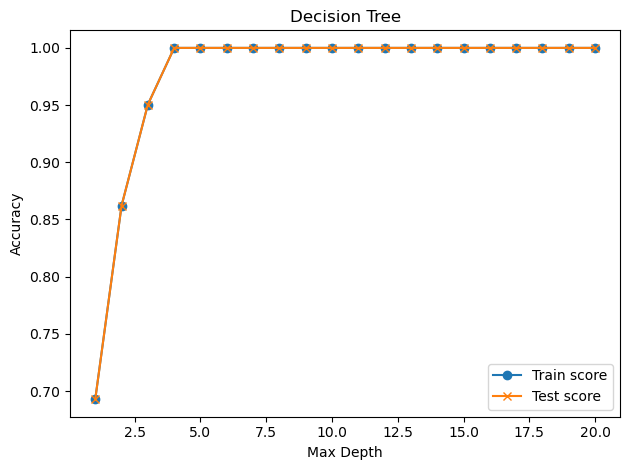

In [41]:
plt.plot(grid_search_dt.cv_results_['param_max_depth'], grid_search_dt.cv_results_['mean_train_score'], label="Train score", marker='o')
plt.plot(grid_search_dt.cv_results_['param_max_depth'], grid_search_dt.cv_results_['mean_test_score'], label="Test score", marker='x')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree")
plt.legend()
plt.tight_layout()
plt.show()

**the model performance on train and validation set is coinciding. this indicates that model is producing better generalization. also, to reduce the computational cost, choose depth=5 because after that the performance of the model is constant**

# results of best DT model

In [43]:
#storing the best DT model results 
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(x_test)
dt_results = {
    "Model": "Decision Tree",
    "CV Accuracy": grid_search_dt.best_score_,
    "Test Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt, average='weighted'),
    "Recall": recall_score(y_test, y_pred_dt, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_dt, average='weighted')
}
results.append(dt_results)

# RandomForest model

In [44]:
#hyper-parameter tuning for best random forest classifier model
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30]}
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30]},
             return_train_score=True, scoring='accuracy')

# plot train and test results(rf)

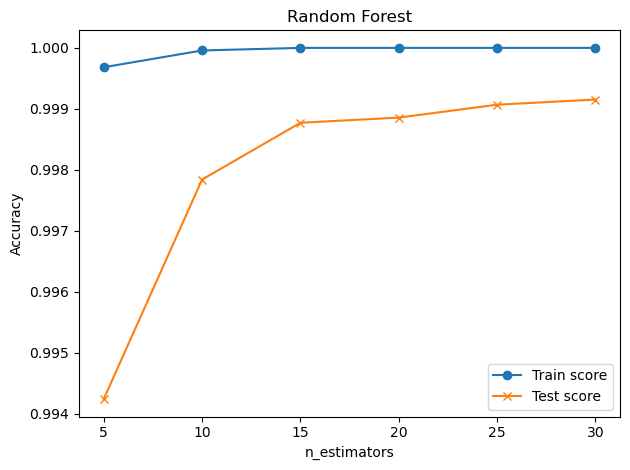

In [45]:
plt.plot(grid_search_rf.cv_results_['param_n_estimators'], grid_search_rf.cv_results_['mean_train_score'], label="Train score", marker='o')
plt.plot(grid_search_rf.cv_results_['param_n_estimators'], grid_search_rf.cv_results_['mean_test_score'], label="Test score", marker='x')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

**As the no.of estimators(i.e, parallel sub-models) increases, the gap between training and validation score is increasing.This indicates that the randomforests are improving their generalization**

# results of best rf model

In [46]:
#storing the best RandomForest model results 
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)
rf_results = {
    "Model": "Random Forest",
    "CV Accuracy": grid_search_rf.best_score_,
    "Test Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, average='weighted'),
    "Recall": recall_score(y_test, y_pred_rf, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_rf, average='weighted')
}
results.append(rf_results)

# Final model selection

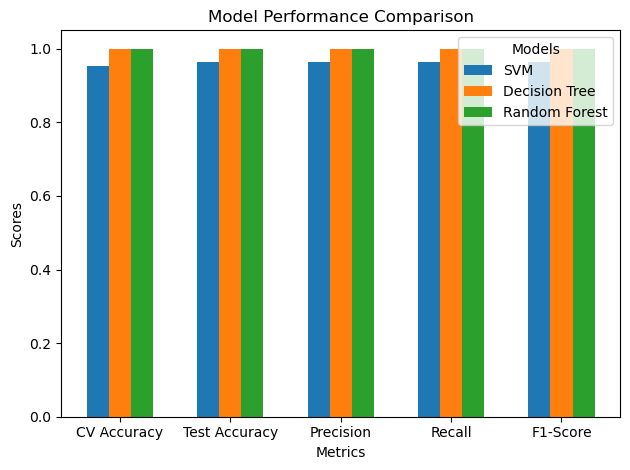

In [47]:
metrics = ["CV Accuracy", "Test Accuracy", "Precision", "Recall", "F1-Score"]
models = [result["Model"] for result in results]
data = [[result[metric] for metric in metrics] for result in results]
bar_width = 0.2
x = np.arange(len(metrics))  # Position for each metric
for i, model in enumerate(models):
    plt.bar(x + i * bar_width, data[i], bar_width, label=model)
    
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x + bar_width, metrics)
plt.legend(title="Models")
plt.tight_layout()
plt.show()

**DecisionTrees and random forests were giving good results. but, out of these two RandomForestClassifier will be the best choice. because it reduces overfitting issues and gives better generalization**

# Results of Final model

In [48]:
final_model = best_rf_model
final_pred = final_model.predict(x_test)
final_report = classification_report(y_test, final_pred)
print('Classification report of the final model on test data')
print(final_report)

Classification report of the final model on test data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       347
           2       1.00      1.00      1.00      1793
           3       1.00      1.00      1.00      2300
           4       1.00      1.00      1.00       652
           5       0.99      1.00      1.00       522
           6       1.00      0.99      0.99       293

    accuracy                           1.00      5907
   macro avg       1.00      1.00      1.00      5907
weighted avg       1.00      1.00      1.00      5907

